In [190]:
from utils import load_dict_from_file, all_int_in_set, flatten
from utils_nlp import get_number_tokens
import numpy as np
import os
import pandas as pd

from dotenv import load_dotenv

load_dotenv()

dataset_name = os.getenv("dataset_name")
data_path = os.getenv("data_path")

In [249]:
results_dict = load_dict_from_file(data_path + "07_08_SP_SIM_final_ent_match_5.json")

Dictionary loaded from ../data/results/07_08_SP_SIM_final_ent_match_5.json


In [250]:
list_precision = []
list_recall = []
list_precision_sim = []
list_recall_sim = []
list_answer_in_context = []
list_matching_reponse_id = []
list_matching_reponse_id_sim = []
for item in results_dict.keys():
    answer_id = all_int_in_set(set(results_dict[item]["answer_id_"]))
    answer_dicts = [answer_ for answer_ in results_dict[item].keys() if type(results_dict[item][answer_]) == dict]

    for dict_name in answer_dicts:
        response_id = all_int_in_set(set(flatten(results_dict[item][dict_name]["matching_ids"])))
        response_id_sim = all_int_in_set(set(flatten(results_dict[item][dict_name]["matching_ids_sim"])))

        response_name = set(results_dict[item][dict_name]["response"])
        context_ = results_dict[item][dict_name]["context"]


        list_precision.append(len(response_id.intersection(answer_id)) / len(response_id) if len(response_id) > 0 else 0)
        list_recall.append(len(response_id.intersection(answer_id)) / len(answer_id) if len(answer_id) > 0 else 0)
        list_precision_sim.append(len(response_id_sim.intersection(answer_id)) / len(response_id_sim) if len(response_id_sim) > 0 else 0)
        list_recall_sim.append(len(response_id_sim.intersection(answer_id)) / len(answer_id) if len(answer_id) > 0 else 0)
        list_matching_reponse_id.append(len(response_id)/len(response_name) if len(response_name) > 0 else 0)
        list_matching_reponse_id_sim.append(len(response_id_sim)/len(response_name) if len(response_name) > 0 else 0)

        count_in_context = 0
        indx = 0
        for answer in results_dict[item]["answer_name"]:
            if answer in context_:
                count_in_context += 1





        # print(count_in_context)
        # print(len(results_dict[item]["answer_name"]))
        # print("----")

        is_in_context = count_in_context/len(results_dict[item]["answer_name"])

        list_answer_in_context.append(is_in_context)     


print("Precision: ", sum(list_precision) / len(list_precision))
print("Recall: ", sum(list_recall) / len(list_recall))
print("Matching response id: ", sum(list_matching_reponse_id) / len(list_matching_reponse_id))
print("Precision sim: ", sum(list_precision_sim) / len(list_precision_sim))
print("Recall sim: ", sum(list_recall_sim) / len(list_recall_sim))
print("Matching response id sim: ", sum(list_matching_reponse_id_sim) / len(list_matching_reponse_id_sim))
print("Answer in context: ", sum(list_answer_in_context) / len(list_answer_in_context))

Precision:  0.11609443054397177
Recall:  0.308702311675442
Matching response id:  1.027064220183486
Precision sim:  0.04020634866177958
Recall sim:  0.3816885721556667
Matching response id sim:  4.381422018348625
Answer in context:  0.5770586265906799


In [251]:
# Precision:  0.11609443054397177
# Recall:  0.308702311675442
# Matching response id:  1.027064220183486
# Precision sim:  0.04020634866177958
# Recall sim:  0.3816885721556667
# Matching response id sim:  4.381422018348625
# Answer in context:  0.7064220183486238

In [179]:
# SHORTEST PATH WITH KG AND SIM
# Precision:  0.1255358621517248
# Recall:  0.3165465155964205
# Matching response id:  1.0337895422870604
# Precision sim:  0.11956571820085125
# Recall sim:  0.2944973289492845
# Matching response id sim:  0.9923161208332771
# Answer in context:  0.6330275229357798

# ENTITY LINKS WITH KG
# Precision:  0.09578141807373627
# Recall:  0.1644432181370858
# Answer in context:  0.23853211009174313

# GPT4
# Precision:  0.058409785932721704
# Recall:  0.05952380952380955
# Matching response id:  0.5668807339449538
# Precision sim:  0.089388379204893
# Recall sim:  0.07121860420565229
# Matching response id sim:  0.9996330275229357

In [180]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

# By question

In [236]:
list_precision = []
list_recall = []
list_answer_in_context = []
list_len_context = []
list_smallest_context_needed = []
list_matching_reponse_id = []
for item in results_dict.keys():
    list_precision_ = []
    list_recall_ = []
    list_answer_in_context_ = []
    list_len_context_ = []
    list_smallest_context_needed_ = []
    list_matching_reponse_id_ = []
    answer_id = set(results_dict[item]["answer_id_"])
    answer_dicts = [answer_ for answer_ in results_dict[item].keys() if type(results_dict[item][answer_]) == dict]

    for dict_name in answer_dicts:
        response_id = set(flatten(results_dict[item][dict_name]["matching_ids"]))
        response_name = set(flatten(results_dict[item][dict_name]["matching_ids"]))

        # print(response_id)
        # print(answer_id)
        context_ = results_dict[item][dict_name]["context"]
        list_len_context_.append(get_number_tokens(context_))

        list_precision_.append(len(response_id.intersection(answer_id)) / len(response_id) if len(response_id) > 0 else 0)
        list_recall_.append(len(response_id.intersection(answer_id)) / len(answer_id) if len(answer_id) > 0 else 0)
        list_matching_reponse_id_.append(len(response_id)/len(response_name) if len(response_name) > 0 else 0)

        count_in_context = 0
        indx = 0
        for answer in results_dict[item]["answer_name"]:
            if answer in context_:
                count_in_context += 1
                # find where answer in in context_
                indx_ = context_.index(answer)
                if indx_ > indx:
                    indx = indx_

        list_smallest_context_needed_.append(get_number_tokens(context_[:indx]))



        # print(count_in_context)
        # print(len(results_dict[item]["answer_name"]))
        # print("----")

        is_in_context = count_in_context/len(results_dict[item]["answer_name"])

        list_answer_in_context_.append(is_in_context)  

    list_precision.append(list_precision_)
    list_recall.append(list_recall_)
    list_answer_in_context.append(list_answer_in_context_)
    list_len_context.append(list_len_context_)
    list_smallest_context_needed.append(list_smallest_context_needed_)
    list_matching_reponse_id.append(list_matching_reponse_id_)      


In [237]:
for item in np.arange(0, len(list_precision[0])):
    print("Precision: ", sum([list_precision[i][item] for i in np.arange(0, len(list_precision))]) / len(list_precision))
    print("Recall: ", sum([list_recall[i][item] for i in np.arange(0, len(list_recall))]) / len(list_recall))
    print("Answer in context: ", sum([list_answer_in_context[i][item] for i in np.arange(0, len(list_answer_in_context))]) / len(list_answer_in_context))
    print("Len context: ", sum([list_len_context[i][item] for i in np.arange(0, len(list_len_context))]) / len(list_len_context))
    print("Smallest context needed: ", sum([list_smallest_context_needed[i][item] for i in np.arange(0, len(list_smallest_context_needed))]) / len(list_smallest_context_needed))
    print("Matching response id: ", sum([list_matching_reponse_id[i][item] for i in np.arange(0, len(list_matching_reponse_id))]) / len(list_matching_reponse_id))

Precision:  0.1152326012417755
Recall:  0.27468372992203477
Answer in context:  0.6088537106310561
Len context:  26643.009174311926
Smallest context needed:  3825.201834862385
Matching response id:  1.0


In [238]:
# Precision:  0.11609443054397177
# Recall:  0.308702311675442
# Answer in context:  0.5770586265906799
# Len context:  37723.28440366973
# Matching response id:  1.0

In [239]:
import matplotlib.pyplot as plt
import numpy as np

def get_variable_name(variable):
    names = [name for name in globals() if globals()[name] is variable]
    if names:
        return names[0]
    return None

def plot_by_question(data, name_of_metric="metric"):
    if name_of_metric=="metric":
        name_of_metric = get_variable_name(data)

    # Calculate mean, min, and max for each question
    means = [np.mean(d) for d in data]
    mins = [np.min(d) for d in data]
    maxs = [np.max(d) for d in data]
    lower_errors = np.clip([m_ - min_ for m_, min_ in zip(means, mins)], 0, 1)
    upper_errors = np.clip([max_ - m_ for m_, max_ in zip(means, maxs)], 0, 1)

    # Plotting
    questions = np.arange(0, len(data))

    plt.figure(figsize=(14, 8))
    plt.errorbar(questions, means, yerr=[lower_errors, upper_errors], fmt='o', ecolor='red', capsize=5, linestyle='-', marker='o', markersize=5, color='blue')

    plt.xlabel('Question', fontsize=14)
    plt.ylabel(f"{name_of_metric}", fontsize=14)
    plt.title(f"Mean {name_of_metric} with Error Bars for Each Question", fontsize=16)
    plt.xticks(questions, rotation=90)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_19527/884215725.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(questions, means, yerr=[lower_errors, upper_errors], fmt='o', ecolor='red', capsize=5, linestyle='-', marker='o', markersize=5, color='blue')


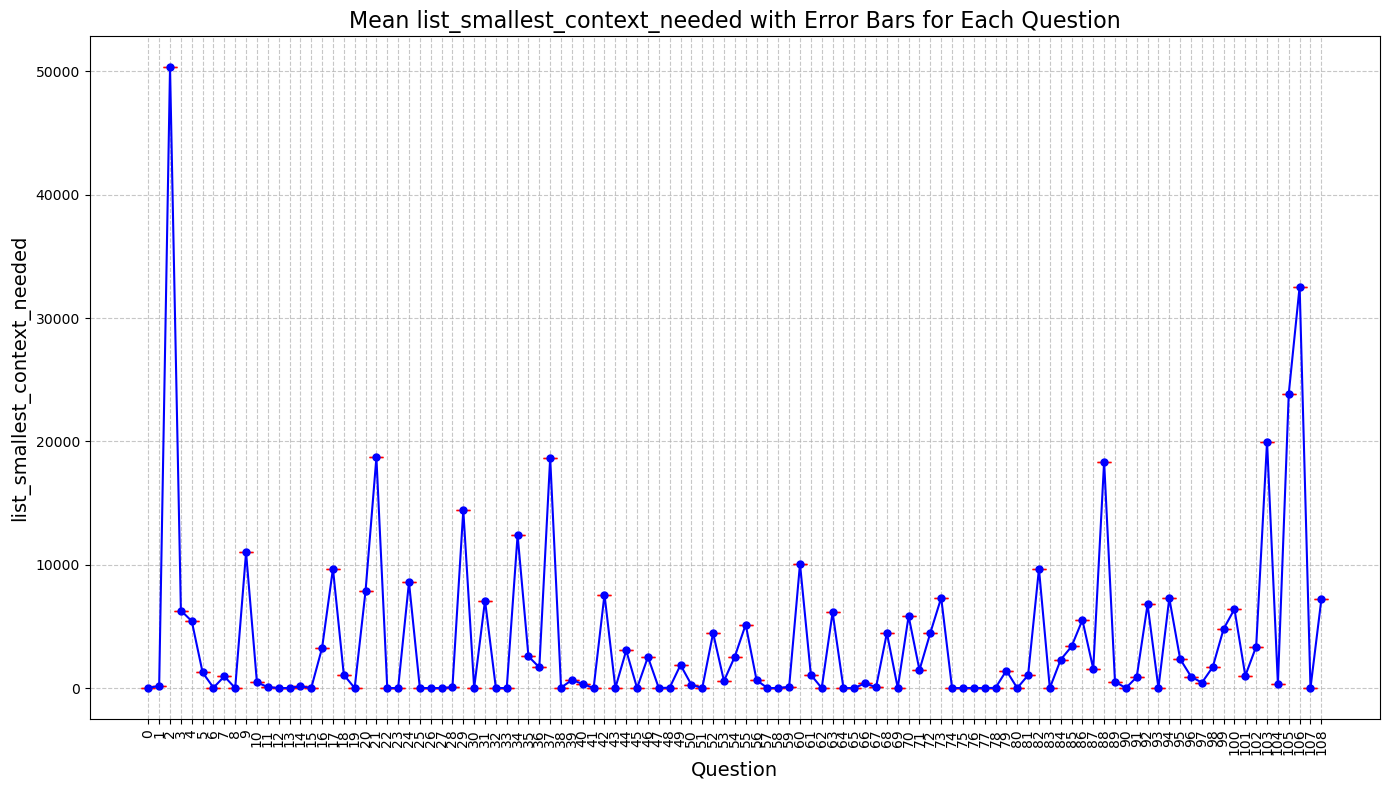

In [240]:
plot_by_question(list_smallest_context_needed)

/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_19527/884215725.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(questions, means, yerr=[lower_errors, upper_errors], fmt='o', ecolor='red', capsize=5, linestyle='-', marker='o', markersize=5, color='blue')


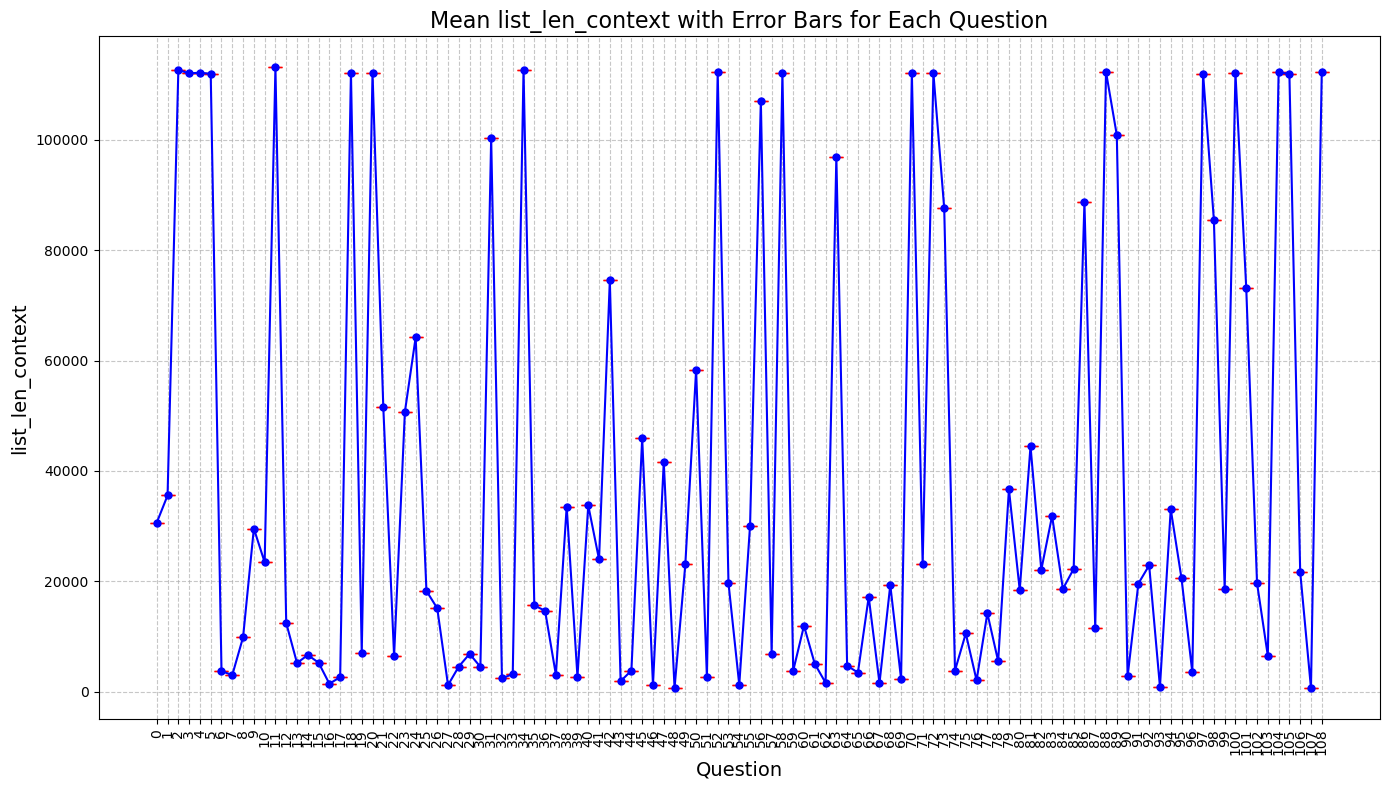

In [219]:
plot_by_question(list_len_context)

/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_19527/884215725.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(questions, means, yerr=[lower_errors, upper_errors], fmt='o', ecolor='red', capsize=5, linestyle='-', marker='o', markersize=5, color='blue')


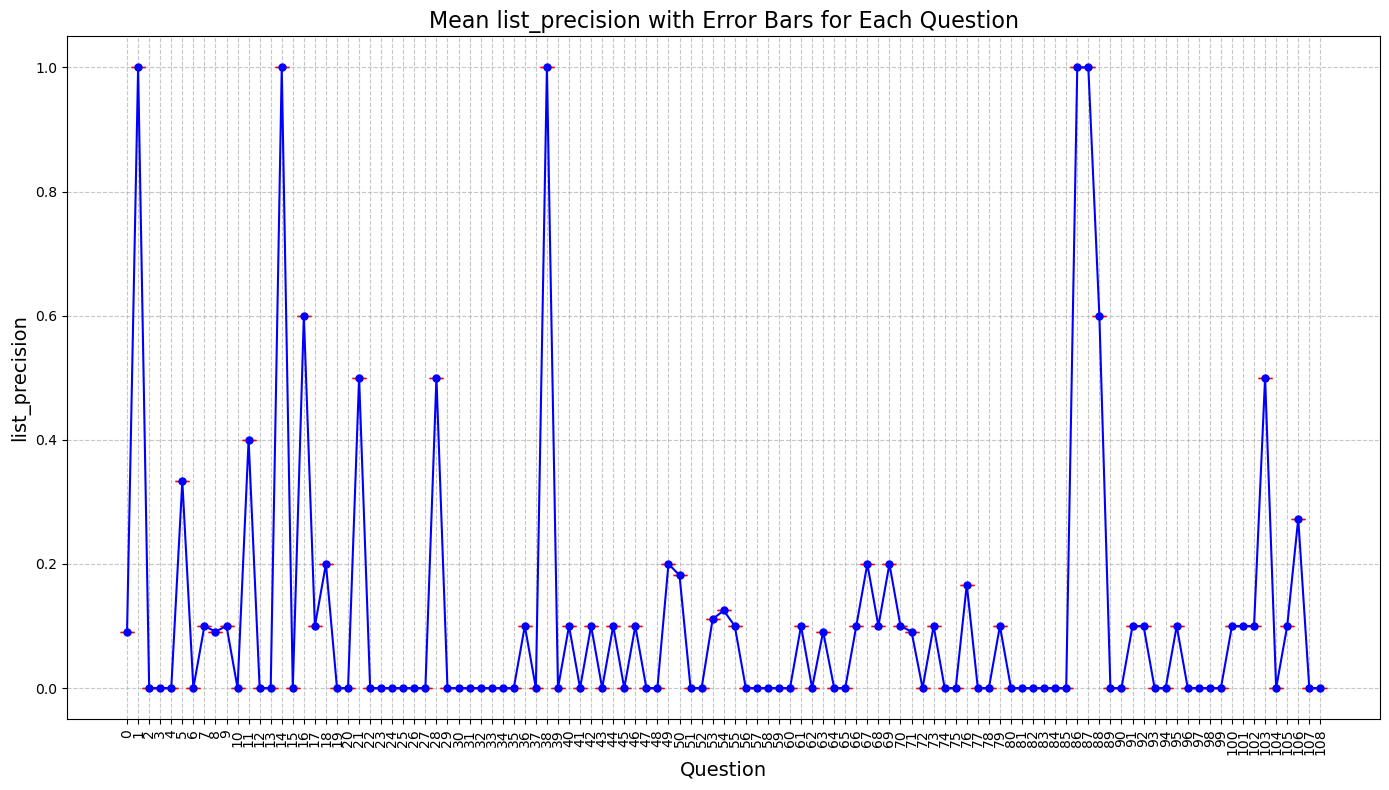

In [220]:
plot_by_question(list_precision)

/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_19527/884215725.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(questions, means, yerr=[lower_errors, upper_errors], fmt='o', ecolor='red', capsize=5, linestyle='-', marker='o', markersize=5, color='blue')


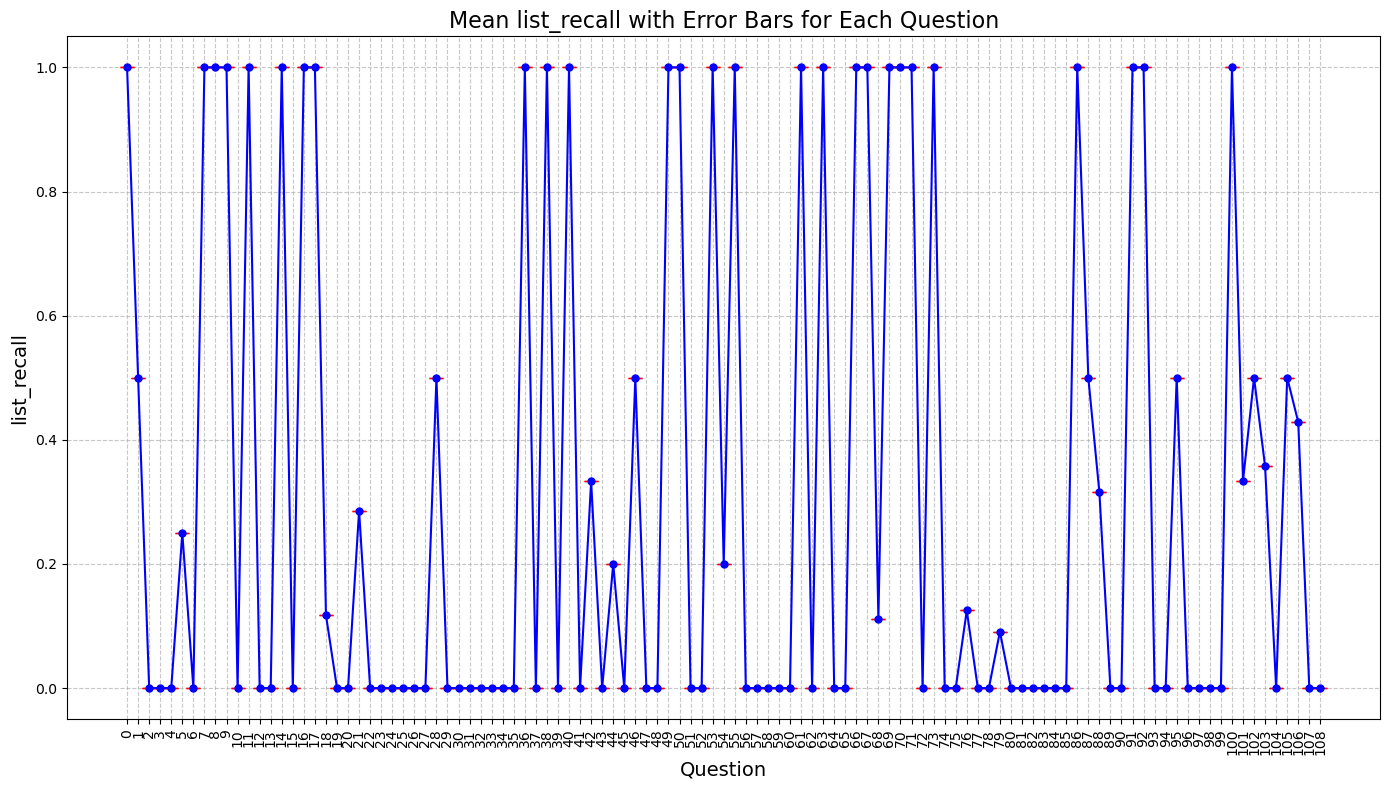

In [221]:
plot_by_question(list_recall)

/var/folders/7r/2xd4t0f94wd49mswwc461j940000gn/T/ipykernel_19527/884215725.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(questions, means, yerr=[lower_errors, upper_errors], fmt='o', ecolor='red', capsize=5, linestyle='-', marker='o', markersize=5, color='blue')


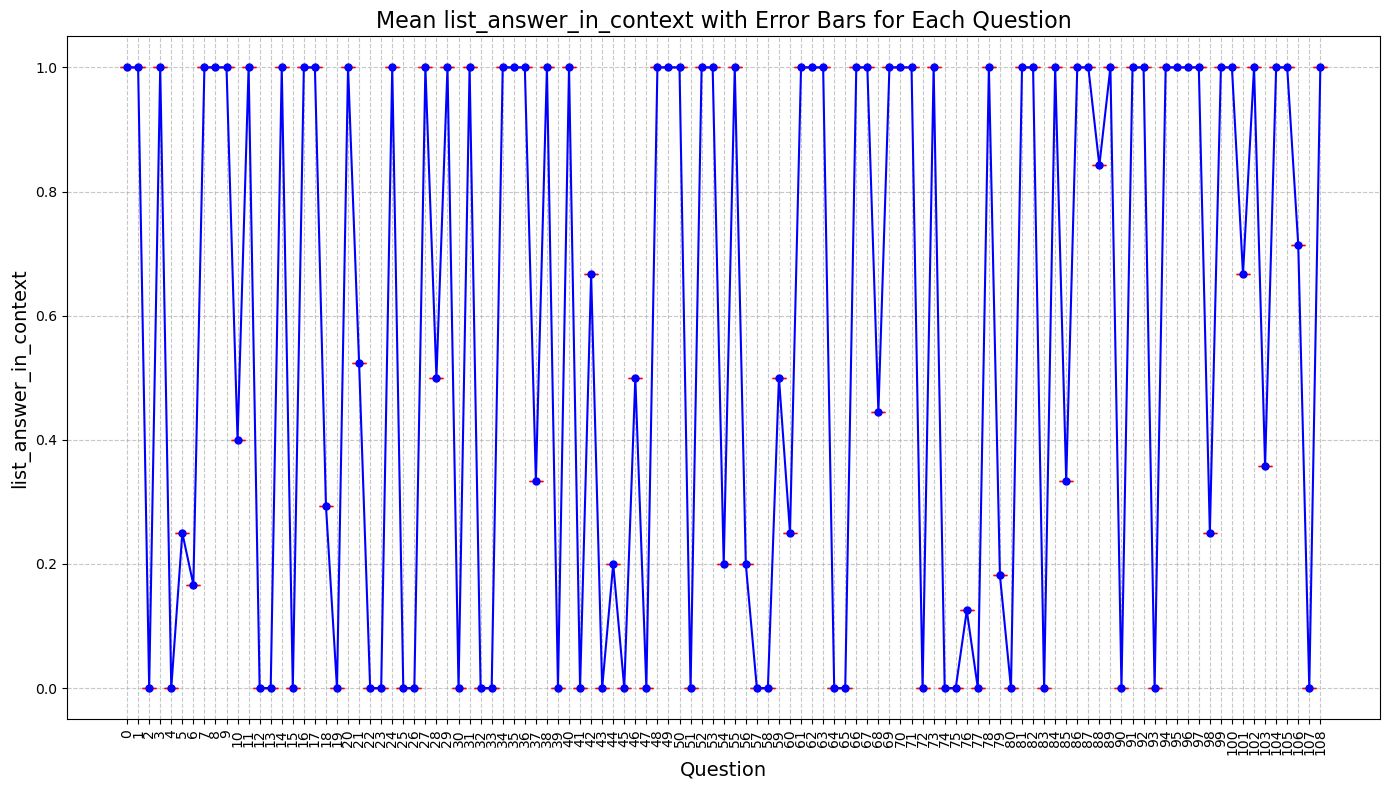

In [222]:
plot_by_question(list_answer_in_context)

In [223]:
def plot_by_question_all(precision_, recall_, in_context_, len_context_):
    # Plotting all metrics for each question in the same plot
    # Note that len_context needs to be on a different axis because it is a different scale

    questions = np.arange(0, len(precision_))

    fig, ax1 = plt.subplots(figsize=(14, 8))

    ax1.set_xlabel('Question', fontsize=14)
    ax1.set_ylabel('Metrics', fontsize=14)

    ax1.plot(questions, precision_, color="green", marker='o', markersize=5, label='Precision')
    ax1.plot(questions, recall_, color="blue", marker='o', markersize=5, label='Recall')
    ax1.plot(questions, in_context_, color="black", marker='o', markersize=5, label='In context')

    ax2 = ax1.twinx()

    ax2.set_ylabel('Len context', fontsize=14)
    ax2.plot(questions, len_context_, color='purple', marker='o', markersize=5, label='Len context')

    plt.legend()

    plt.tight_layout()
    plt.show()

In [241]:
import numpy as np
import matplotlib.pyplot as plt

def plot_by_question_all_subplot(precision_, recall_, in_context_, list_smallest_context_needed, len_context_):
    questions = np.arange(0, len(precision_))

    fig, axs = plt.subplots(5, 1, figsize=(14, 12), sharex=True)

    axs[0].plot(questions, precision_, color="green", marker='o', markersize=5, label='Precision')
    axs[0].set_ylabel('Precision', fontsize=12)
    axs[0].legend(loc='upper right')
    axs[0].grid(True)

    axs[1].plot(questions, recall_, color="blue", marker='o', markersize=5, label='Recall')
    axs[1].set_ylabel('Recall', fontsize=12)
    axs[1].legend(loc='upper right')
    axs[1].grid(True)

    axs[2].plot(questions, in_context_, color="black", marker='o', markersize=5, label='In context')
    axs[2].set_ylabel('In context', fontsize=12)
    axs[2].legend(loc='upper right')
    axs[2].grid(True)

    axs[3].plot(questions, list_smallest_context_needed, color="purple", marker='o', markersize=5, label='Len context')
    axs[3].set_ylabel('Len context', fontsize=12)
    axs[3].set_xlabel('Question', fontsize=14)
    axs[3].legend(loc='upper right')
    axs[3].grid(True)


    axs[4].plot(questions, len_context_, color="red", marker='o', markersize=5, label='Len context')
    axs[4].set_ylabel('Len context', fontsize=12)
    axs[4].set_xlabel('Question', fontsize=14)
    axs[4].legend(loc='upper right')
    axs[4].grid(True)

    plt.tight_layout()
    plt.show()


In [242]:
np.mean(list_answer_in_context)

0.6088537106310561

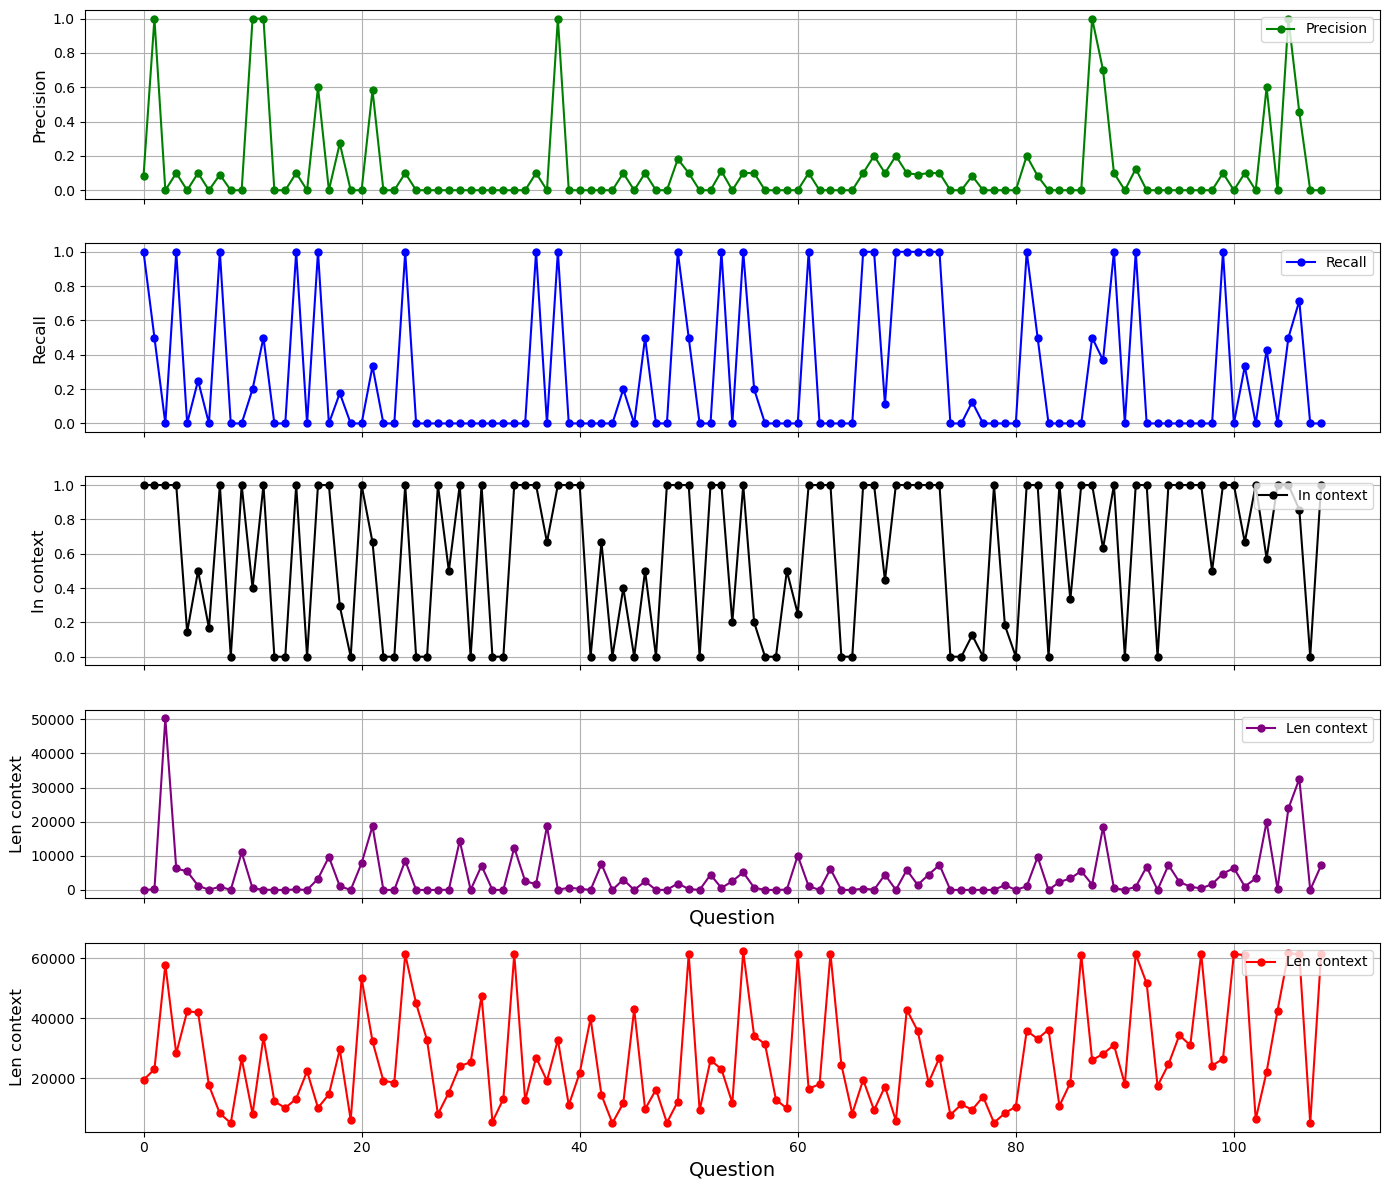

In [243]:
plot_by_question_all_subplot(list_precision, list_recall, list_answer_in_context, list_smallest_context_needed, list_len_context)

In [245]:
df = pd.DataFrame(zip(list_len_context, list_precision, list_recall, list_smallest_context_needed, list_answer_in_context), columns=["len_context", "precision", "recall", "smallest_context_needed", "answer_in_context"])
# make all values in the dataframe from list to int
df["len_context"] = df["len_context"].apply(lambda x: int(x[0]))
df["precision"] = df["precision"].apply(lambda x: float(x[0]))
df["recall"] = df["recall"].apply(lambda x: float(x[0]))
df["answer_in_context"] = df["answer_in_context"].apply(lambda x: float(x[0]))
df["smallest_context_needed"] = df["smallest_context_needed"].apply(lambda x: float(x[0]))

# make a correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,len_context,precision,recall,smallest_context_needed,answer_in_context
len_context,1.000000,0.077590,0.100575,0.409800,0.334394
precision,0.077590,1.000000,0.379653,0.197414,0.246308
recall,0.100575,0.379653,1.000000,0.024997,0.516340
smallest_context_needed,0.409800,0.197414,0.024997,1.000000,0.294415
answer_in_context,0.334394,0.246308,0.516340,0.294415,1.000000


        len_context  precision     recall  smallest_context_needed  \
count     80.000000  80.000000  80.000000                80.000000   
mean   29729.462500   0.157004   0.374257              5211.837500   
std    18726.996675   0.281668   0.433385              8005.434841   
min     5158.000000   0.000000   0.000000                 0.000000   
25%    14086.750000   0.000000   0.000000               456.000000   
50%    26042.500000   0.083333   0.150735              2325.000000   
75%    42365.500000   0.100000   1.000000              6861.000000   
max    62292.000000   1.000000   1.000000             50322.000000   

       answer_in_context  
count          80.000000  
mean            0.829563  
std             0.284369  
min             0.125000  
25%             0.666667  
50%             1.000000  
75%             1.000000  
max             1.000000  


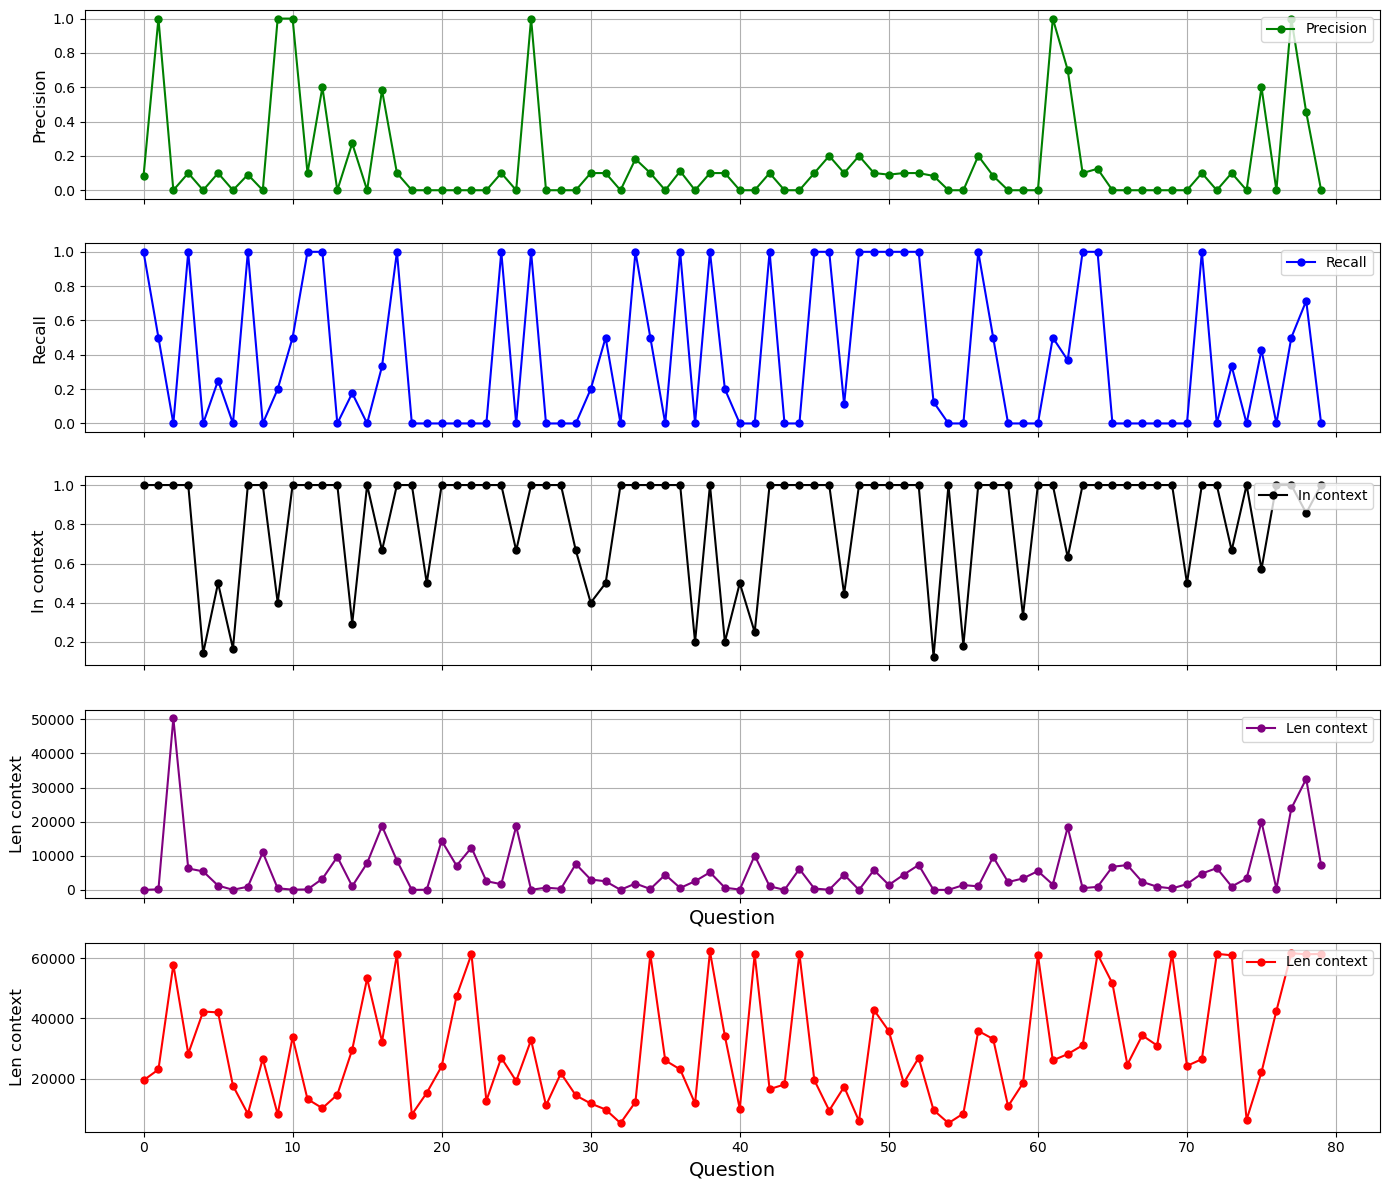

In [246]:
df_ = df[(df["answer_in_context"] > 0)]
df_

# get all columns to lists
list_len_context_ = df_["len_context"].tolist()
list_precision_ = df_["precision"].tolist()
list_recall_ = df_["recall"].tolist()
list_smallest_context_needed_ = df_["smallest_context_needed"].tolist()
list_answer_in_context_ = df_["answer_in_context"].tolist()

print(df_.describe())


plot_by_question_all_subplot(list_precision_, list_recall_, list_answer_in_context_, list_smallest_context_needed_, list_len_context_)

         len_context  precision     recall  answer_in_context
count      47.000000  47.000000  47.000000          47.000000
mean    38966.425532   0.269240   0.715927           0.818427
std     39335.544609   0.291559   0.347897           0.295021
min      1264.000000   0.090909   0.090909           0.125000
25%      6603.500000   0.100000   0.392857           0.666667
50%     22909.000000   0.100000   1.000000           1.000000
75%     65712.000000   0.303030   1.000000           1.000000
max    113090.000000   1.000000   1.000000           1.000000


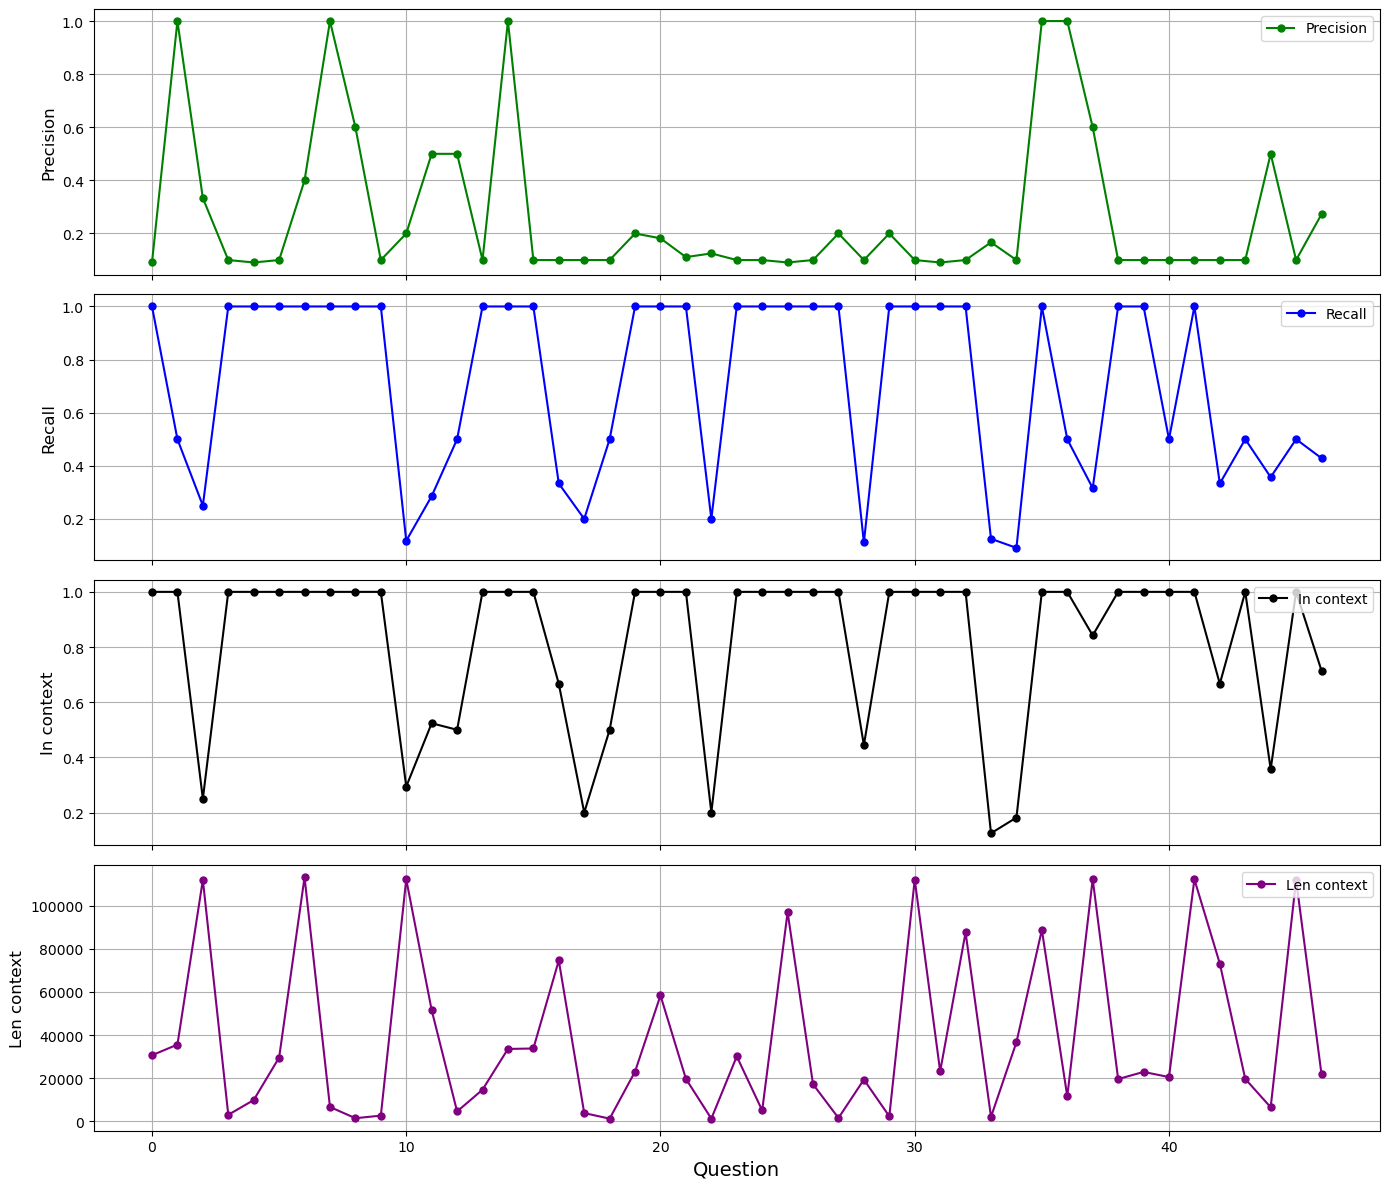

In [228]:
df_ = df[(df["recall"] > 0) & (df["answer_in_context"] > 0)]
df_

# get all columns to lists
list_len_context_ = df_["len_context"].tolist()
list_precision_ = df_["precision"].tolist()
list_recall_ = df_["recall"].tolist()
list_answer_in_context_ = df_["answer_in_context"].tolist()

print(df_.describe())

plot_by_question_all_subplot(list_precision_, list_recall_, list_answer_in_context_, list_len_context_)

In [229]:
import numpy as np
import matplotlib.pyplot as plt

def plot_by_question_all(precision_, recall_, in_context_, len_context_):
    # Plotting all metrics for each question in the same plot with improved readability
    questions = np.arange(0, len(precision_))

    fig, ax1 = plt.subplots(figsize=(14, 8))

    ax1.set_xlabel('Question', fontsize=14)
    ax1.set_ylabel('Metrics', fontsize=14)

    # Plot precision, recall, and in context with different line styles and markers
    ax1.plot(questions, precision_, color="green", linestyle='-', marker='o', markersize=5, label='Precision')
    ax1.plot(questions, recall_, color="blue", linestyle='--', marker='s', markersize=5, label='Recall')
    ax1.plot(questions, in_context_, color="black", linestyle='-.', marker='^', markersize=5, label='In context')

    # Adding grid to improve readability
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Secondary y-axis for len_context
    ax2 = ax1.twinx()
    ax2.set_ylabel('Len context', fontsize=14)
    ax2.plot(questions, len_context_, color='purple', linestyle=':', marker='d', markersize=5, label='Len context')

    # Legends for both y-axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=12)

    plt.tight_layout()
    plt.show()

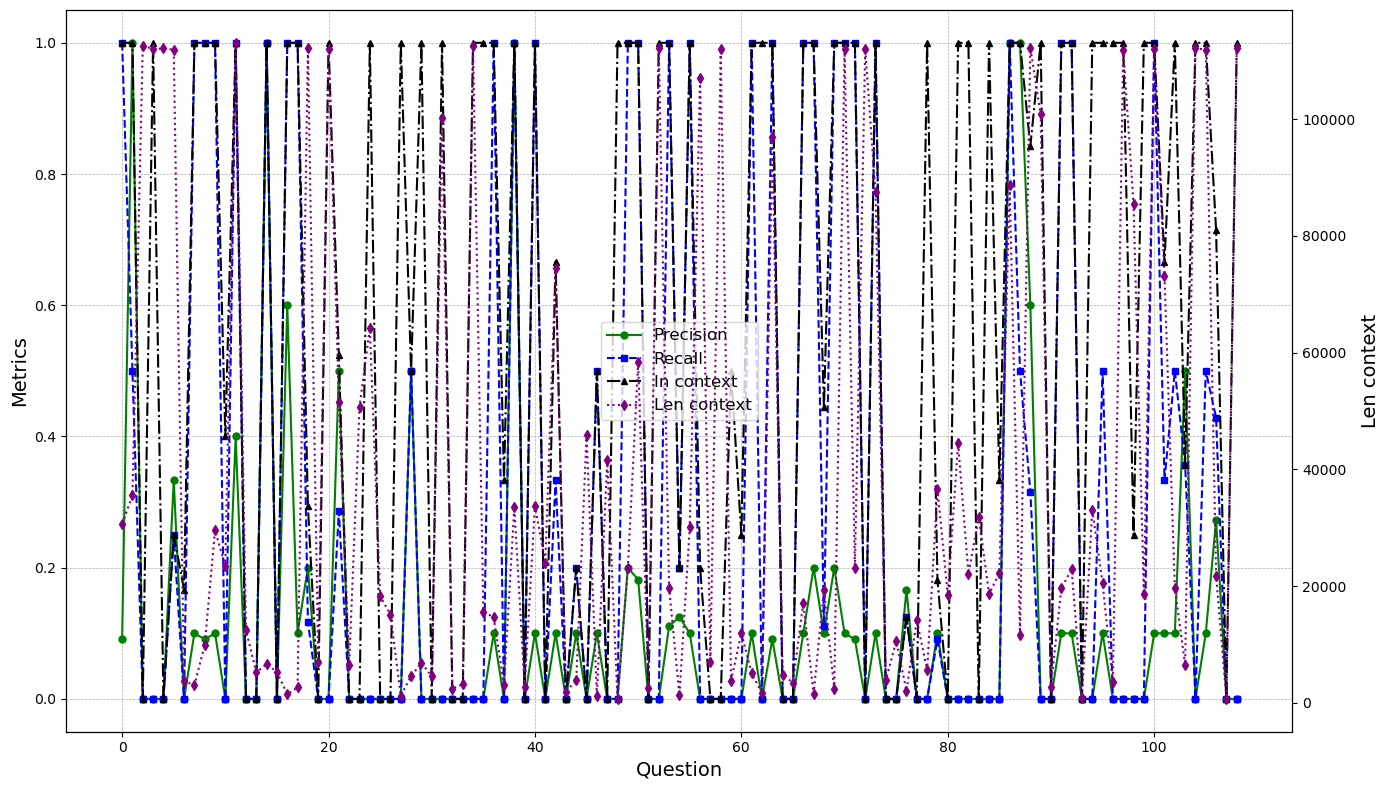

In [230]:
plot_by_question_all(list_precision, list_recall, list_answer_in_context, list_len_context)